# Showcase for the model

Demonstration for prediction on images not contained in the training or validation set.

In [1]:
import torch
from model import GoatDetector, threshold
import cv2
from torchvision import transforms
from matplotlib import pyplot as plt
from os import listdir

In [2]:
model = GoatDetector()
model.load_state_dict(torch.load("./saved_models/temp"))
model = model.eval()

size = 64

In [3]:
def load_image(path):
    image = cv2.imread(path)[:, :, ::-1]
    im = cv2.resize(image, (size, size))
    transform = transforms.ToTensor()
    tensor = transform(im)
    return image, tensor

In [4]:
def predict(image):
    out = model(image.unsqueeze(0))
    pred = out.item() >= threshold
    if pred:
        print("I think its a goat! Ew!")
    else:
        print("It's not a goat.")

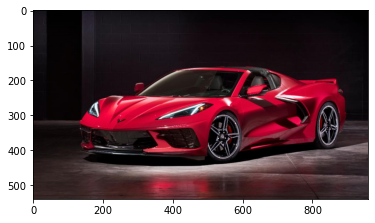

It's not a goat.



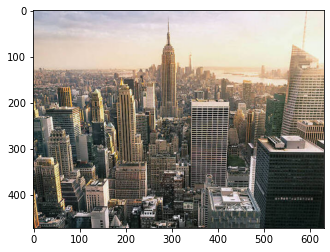

It's not a goat.



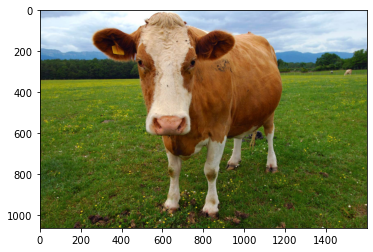

It's not a goat.



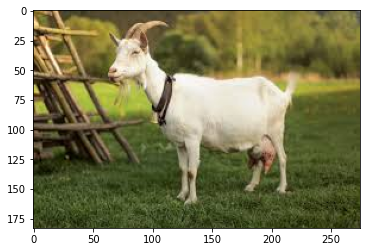

I think its a goat! Ew!



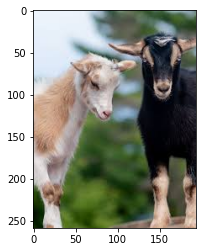

I think its a goat! Ew!



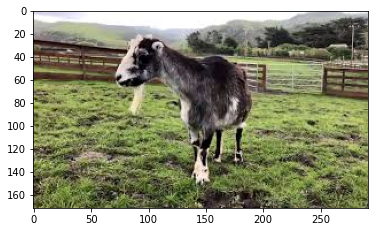

It's not a goat.



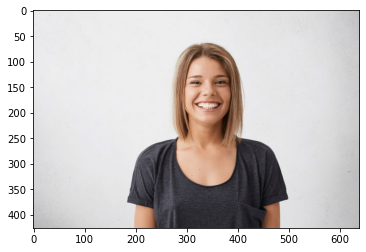

It's not a goat.



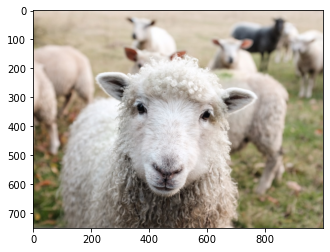

It's not a goat.



In [5]:
for name in listdir("./example_ims"):
    image, tensor = load_image("./example_ims/"+name)
    plt.imshow(image)
    plt.show()
    predict(tensor)
    print()